# Data Pipelining 

### Aim
To Implement Data Pipelining using Tensorflow.

### Source Code

In [2]:
import tensorflow as tf
import pathlib
import os 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Dataset from tensor in memory

In [3]:
t1 = tf.constant([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype=tf.float32)


2024-04-16 16:55:30.355233: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-16 16:55:30.355786: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
ds1 = tf.data.Dataset.from_tensors(t1)
ds2 = tf.data.Dataset.from_tensor_slices(t1)

for element in ds1:
    print(element)
    
for element in ds2:
    print(element)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


2024-04-16 16:55:30.394889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-16 16:55:30.404660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Dataset from numpy arrays
#### Downloading dataset using `tf.keras.datasets` API

In [5]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
images, labels = train
images = images/ 255

type(images), type(labels)

(numpy.ndarray, numpy.ndarray)

In [7]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

### TextLine Dataset
#### Downloading the dataset

In [8]:
directory = "https://storage.googleapis.com/download.tensorflow.org/data/illiad/"
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']
file_paths = [
    tf.keras.utils.get_file(file_name, directory+file_name)
    for file_name in file_names
]

815980/815980 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
809730/809730 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
807992/807992 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


### Creating and viewing the dataset

In [9]:
text_line_dataset = tf.data.TextLineDataset(file_paths)
for line in text_line_dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


2024-04-16 16:55:52.940622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Text dataset from folder

#### Downloading the datset directory dataset

In [10]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    origin = data_url,
    untar = True, 
    cache_dir = "stack_overflow",
    cache_subdir=""
)

6053168/6053168 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
dataset_dir = pathlib.Path(dataset_dir).parent
print(dataset_dir)

/tmp/.keras


In [12]:
batch_size = 32
seed = 42

train_dir = dataset_dir/'train'
train_dir

PosixPath('/tmp/.keras/train')

In [13]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    train_dir, batch_size=batch_size,
    validation_split=0.2,
    subset = 'training',
    seed = seed
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


### CSV Datasets

#### Downloading titanic dataset

In [14]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file)
titanic_dataset = tf.data.Dataset.from_tensor_slices(dict(df))

30874/30874 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


#### Loading CSV using _pandas_

In [15]:
for feature_batch in titanic_dataset.take(1):
    for key, value in feature_batch.items():
        print("{:20s}:{}".format(key, value))

survived            :0
sex                 :b'male'
age                 :22.0
n_siblings_spouses  :1
parch               :0
fare                :7.25
class               :b'Third'
deck                :b'unknown'
embark_town         :b'Southampton'
alone               :b'n'


2024-04-16 16:55:58.714135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#### Loading CSV using `tf.data.experimental.make_csv_dataset` 

In [16]:
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, 
    batch_size=4, 
    label_name="survived",
    select_columns=["class", "fare", "survived"]
)

for feature_batch, label_batch in titanic_batches.take(1):
    print(f"survived: {label_batch}")
    for key, value in feature_batch.items():
        print(f"{key:20s}:{value}")

survived: [0 1 0 0]
fare                :[27.      7.75    7.2292  8.05  ]
class               :[b'Second' b'Third' b'Third' b'Third']


2024-04-16 16:55:58.799920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#### Loading CSV using `tf.data.experimental.CsvDataset`

In [17]:
titanic_types = [
    tf.int32, tf.string, tf.float32,tf.int32, tf.int32, 
    tf.float32, tf.string, tf.string, tf.string, tf.string
]

In [18]:
dataset = tf.data.experimental.CsvDataset(
    titanic_file, 
    titanic_types, 
    header=True
)

for line in dataset.take(10):
    print([item.numpy() for item in line])
    

[0, b'male', 22.0, 1, 0, 7.25, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 38.0, 1, 0, 71.2833, b'First', b'C', b'Cherbourg', b'n']
[1, b'female', 26.0, 0, 0, 7.925, b'Third', b'unknown', b'Southampton', b'y']
[1, b'female', 35.0, 1, 0, 53.1, b'First', b'C', b'Southampton', b'n']
[0, b'male', 28.0, 0, 0, 8.4583, b'Third', b'unknown', b'Queenstown', b'y']
[0, b'male', 2.0, 3, 1, 21.075, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 27.0, 0, 2, 11.1333, b'Third', b'unknown', b'Southampton', b'n']
[1, b'female', 14.0, 1, 0, 30.0708, b'Second', b'unknown', b'Cherbourg', b'n']
[1, b'female', 4.0, 1, 1, 16.7, b'Third', b'G', b'Southampton', b'n']
[0, b'male', 20.0, 0, 0, 8.05, b'Third', b'unknown', b'Southampton', b'y']


2024-04-16 16:55:58.832317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Dataset from sets of files

#### Downloading flower dataset

In [19]:
flower_root = tf.keras.utils.get_file('flower_photos', 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True)
flower_root = pathlib.Path(flower_root)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


#### Creating the datset from files

In [20]:
for item in flower_root.glob('*'):
    print(item)

/home/redloaded/.keras/datasets/flower_photos/roses
/home/redloaded/.keras/datasets/flower_photos/LICENSE.txt
/home/redloaded/.keras/datasets/flower_photos/tulips
/home/redloaded/.keras/datasets/flower_photos/dandelion
/home/redloaded/.keras/datasets/flower_photos/daisy
/home/redloaded/.keras/datasets/flower_photos/sunflowers


In [21]:
file_path_ds = tf.data.Dataset.list_files(str(flower_root/'*/*'))

def process_path(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    return tf.io.read_file(file_path), label

labeled_ds = file_path_ds.map(process_path) 

for image_raw, label in labeled_ds.take(1):
    print(image_raw, label, sep="\n")

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\xff\xc0\x00\x11\x08\x01\x19\x01\xf4\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x03\x04\x06\x07\x08\x01\x02\t\n\x00\x0b\xff\xc4\x00N\x10\x00\x02\x01\x02\x05\x02\x05\x01\x04\x07\x06\x04\x04\x03\x06\x07\x01\x02\x03\x04\x11\x00\x05\x06\x12!1A\x07\x13"Qaq\x142\x81\x91\x08#B\xa1\xb1\xc1\xf0\x153Rr\xd1\xe1\x16

2024-04-16 16:56:33.399472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Batching datasets

In [22]:

inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0, -100, -1)

dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
    print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


2024-04-16 16:56:33.421989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#### Padded Batching

In [23]:
dataset.batch(4, drop_remainder=True)

dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))
padded_batch_dataset = dataset.padded_batch(4, padded_shapes=(None, ))
for batch in padded_batch_dataset.take(2):
    print(batch.numpy(), end="\n\n")

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



2024-04-16 16:56:33.460945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Shuffling Dataset

In [24]:
dataset = tf.data.TextLineDataset(titanic_file)
dataset.shuffle(buffer_size=10)

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

### Preprocessing Data

#### Using `tf.map` to apply preprocessing

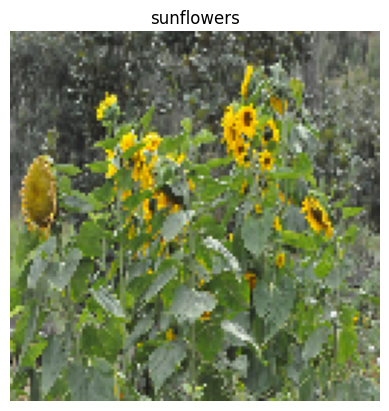

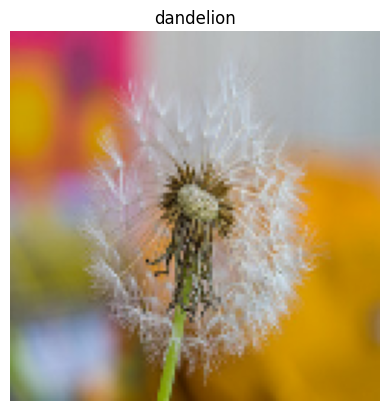

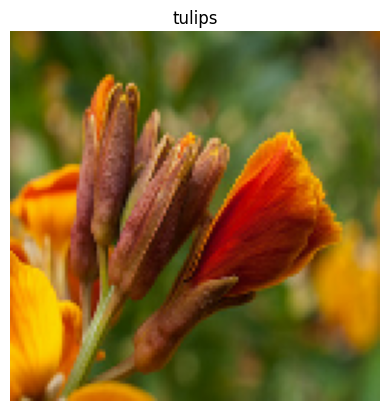

2024-04-16 17:07:26.464173: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [49]:
file_path_ds = tf.data.Dataset.list_files(str(flower_root/'*/*'))

def parse_image(filename):
    label = tf.strings.split(filename, os.sep)[-2]
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)

    
    image = tf.image.resize(image, [128, 128])
    
    return image, label

image_ds = file_path_ds.map(parse_image)

def show(image, label):
    plt.imshow(image)
    plt.title(label.numpy().decode('utf-8'))
    
    
    plt.axis("off")
    
for image, label in image_ds.take(3):
    show(image, label)
    plt.show()
    
    

### Training

In [26]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images  = images / 255.0


fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images, labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(fmnist_train_ds, epochs=2)

loss, accuracy = model.evaluate(fmnist_train_ds)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 916us/step - accuracy: 0.7388 - loss: 0.7828
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.8410 - loss: 0.4721
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.8398 - loss: 0.4610


### Evaluating

In [27]:
print("Loss:", loss, "Accuracy:", accuracy)
predict = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict, steps=10)
print(result.shape)

Loss: 0.45815372467041016 Accuracy: 0.8407666683197021
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step
(320, 10)


### Inference

In [75]:
image, label = next(iter(fmnist_train_ds))
images = image.numpy()[:9]

res = tf.argmax(model(image), axis=-1)


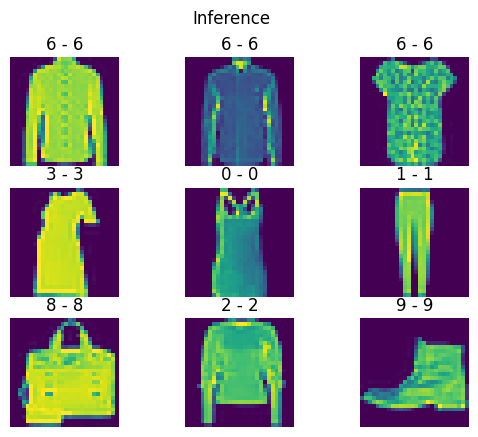

In [77]:
plt.suptitle("Inference")
for i, (img, r) in enumerate(zip(images, res)):
    plt.subplot(331+i)
    plt.title( f"{label[i]} - {res[i]}")
    plt.imshow(img)
    plt.axis("off")
plt.show()
